In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gpd

In [2]:
url = 'https://github.com/eueung/fireloc/raw/master/VNP14IMGTDL_NRT_SouthEast_Asia_24h.csv'
df  = pd.read_csv(url)

In [3]:
#df.shape
#df.dtypes
#df.isna().sum()
df.tail()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
4480,-7.90662,111.96812,303.1,0.56,0.43,2019-10-12,1806,N,nominal,1.0NRT,290.3,0.7,N
4481,-8.11514,112.92585,295.7,0.43,0.46,2019-10-12,1806,N,nominal,1.0NRT,276.4,0.8,N
4482,-7.49630,108.19198,296.7,0.39,0.36,2019-10-12,1806,N,nominal,1.0NRT,274.9,0.3,N
4483,-7.73900,109.38881,302.7,0.42,0.38,2019-10-12,1806,N,nominal,1.0NRT,286.2,0.6,N
4484,-7.70328,108.99650,307.1,0.41,0.37,2019-10-12,1806,N,nominal,1.0NRT,289.8,1.5,N


---

In [4]:
gdf   = gpd.GeoDataFrame(df,crs={'init': 'epsg:4326'}, geometry=gpd.points_from_xy(df.longitude, df.latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

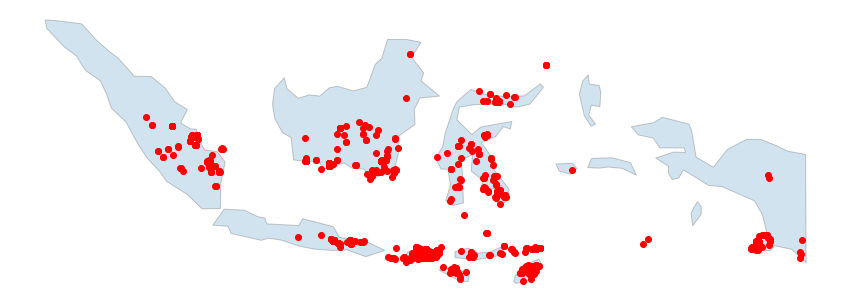

In [5]:
var_gdf = gdf[(gdf.confidence=='high')|(gdf.frp>10)].copy()

ax = world[world.name == 'Indonesia'].plot(figsize=(15, 10), alpha=0.2, edgecolor='k')
ax.set_axis_off()
var_gdf.plot(ax=ax, color='red')
plt.show()

---

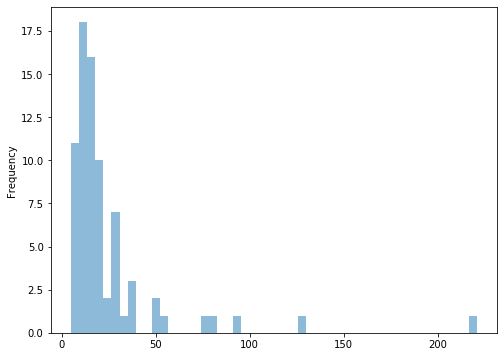

In [6]:
df[df['confidence']=='high']['frp'].plot(figsize=(8, 6),kind='hist',bins=50, alpha=0.5)
#df[df['confidence']=='low']['frp'].plot(figsize=(8, 6),kind='hist',bins=50, alpha=0.5)
#df[df['confidence']=='low']['frp'].plot(figsize=(8, 6),kind='kde')
plt.show()

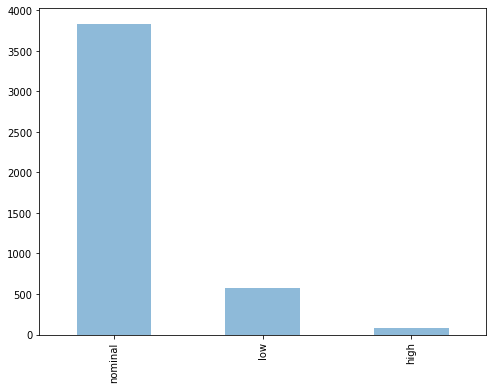

In [7]:
#df['acq_date'].value_counts().plot(figsize=(8, 6),kind='bar', alpha=0.5)
#df['daynight'].value_counts().plot(figsize=(8, 6),kind='bar', alpha=0.5)
df['confidence'].value_counts().plot(figsize=(8, 6),kind='bar', alpha=0.5)
plt.show()

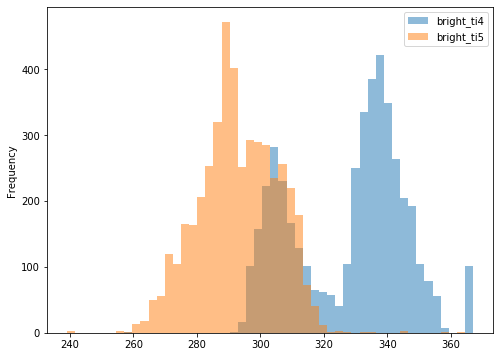

In [8]:
df[['bright_ti4','bright_ti5']].plot(figsize=(8, 6),kind='hist',bins=50, alpha=0.5)
plt.show()

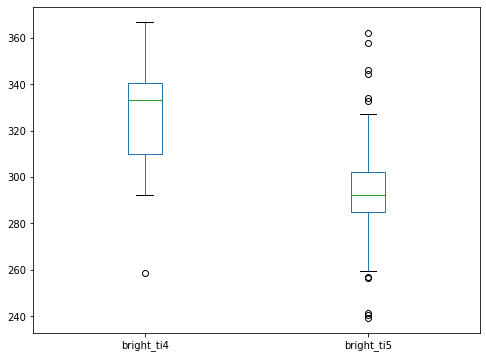

In [9]:
df[['bright_ti4','bright_ti5']].plot(figsize=(8, 6),kind='box')
plt.show()

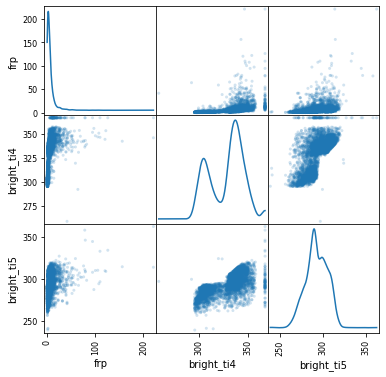

In [10]:
#df.plot(figsize=(8, 6),kind='scatter',x='frp',y='bright_ti4')
#df.plot(figsize=(8, 6),kind='scatter',x='frp',y='bright_ti5')

from pandas.plotting import scatter_matrix
scatter_matrix(df[['frp','bright_ti4','bright_ti5']], alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()